# (5주차) 10월7일
> 알렉스넷(잡담), 로지스틱 회귀분석 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-ya8Fv0HApuyVpd2MQeTICF

`-` (1/2) 기말고사 안내 + 알렉스넷 

`-` (2/2) 로지스틱 회귀분석 

### Logistic regression 

In [3]:
import torch 
import matplotlib.pyplot as plt

### Example 

`-` 현실에서 이런 경우가 많음 
- $x$가 커질수록 (혹은 작아질수록) 성공확률이 증가함. 

`-` 이러한 모형은 아래와 같이 설계할 수 있음 <--- 외우세요!!!

- $y_i \sim Ber(\pi_i),\quad $ where $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$

- $\hat{y}_i= \frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$ 

- $loss= - \sum_{i=1}^{n} \big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$ <--- 외우세요!!

`-` 예제시작 

In [12]:
X=torch.linspace(-1,1,2000).reshape(2000,1)
w0= - 1 
w1= 5 
u = w0+X*w1 
v = torch.exp(u)/(1+torch.exp(u)) # v=πi
y = torch.bernoulli(v) 

`-` RBM --> DBN (2006년, 사이언스지) 

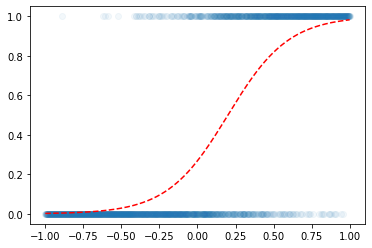

In [19]:
plt.scatter(X,y,alpha=0.05)
plt.plot(X,v,'--r')

`-` 다이어그램으로 표현하면 

In [23]:
import graphviz

In [24]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

나름대로 딥러닝의 골치덩이를 해결하는 방법을 제시함.. --> 관심 X 

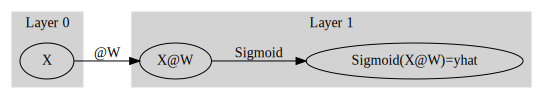

In [25]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "X@W"[label="@W"]
    "X@W" -> "Sigmoid(X@W)=yhat"[label="Sigmoid"]
    label = "Layer 1"
}
''')

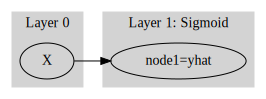

In [26]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    X
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    X -> "node1=yhat"
    label = "Layer 1: Sigmoid"
}
''')

`-` 아키텍처, 손실함수, 옵티마이저 

In [27]:
torch.manual_seed(43052) 
l1=torch.nn.Linear(in_features=1,out_features=1,bias=True) 
a1=torch.nn.Sigmoid() 
net=torch.nn.Sequential(l1,a1) 
#loss = torch.mean((y-yhat)**2) <--- 이러면 안됩니다!!!
optimizer=torch.optim.SGD(net.parameters(),lr=0.05) 

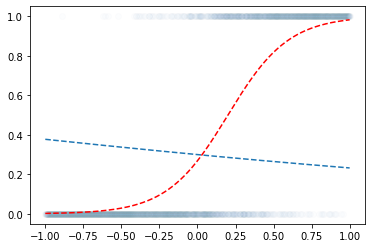

In [30]:
plt.scatter(X,y,alpha=0.01) 
plt.plot(X,net(X).data,'--') 
plt.plot(X,v,'--r')

`-` step1~4 

In [31]:
for epoc in range(10000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=-torch.mean(y*torch.log(yhat) + (1-y)*torch.log(1-yhat)) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizer.step() 
    net.zero_grad() 

In [32]:
list(net.parameters())

[Parameter containing:
 tensor([[4.6663]], requires_grad=True),
 Parameter containing:
 tensor([-0.9541], requires_grad=True)]

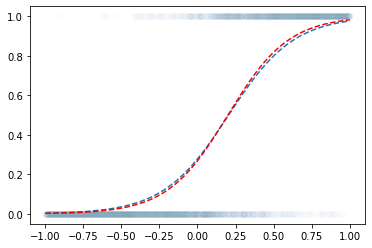

In [34]:
plt.scatter(X,y,alpha=0.01) 
plt.plot(X,net(X).data,'--') 
plt.plot(X,v,'--r')

### 숙제 

loss를 mse로 바꿔서 돌려볼것 

In [ ]:
torch.manual_seed(43052) 
l1=torch.nn.Linear(in_features=1,out_features=1,bias=True) 
a1=torch.nn.Sigmoid() 
net=torch.nn.Sequential(l1,a1) 
#loss = torch.mean((y-yhat)**2) <--- 이러면 안됩니다!!!
optimizer=torch.optim.SGD(net.parameters(),lr=0.05) 

In [ ]:
for epoc in range(10000): 
    ## 1 
    yhat=net(X) 
    ## 2 
#####    loss=-torch.mean(y*torch.log(yhat) + (1-y)*torch.log(1-yhat)) <-- 여기만수정해서!!
    ## 3 
    loss.backward() 
    ## 4 
    optimizer.step() 
    net.zero_grad() 

In [32]:
list(net.parameters())

[Parameter containing:
 tensor([[4.6663]], requires_grad=True),
 Parameter containing:
 tensor([-0.9541], requires_grad=True)]

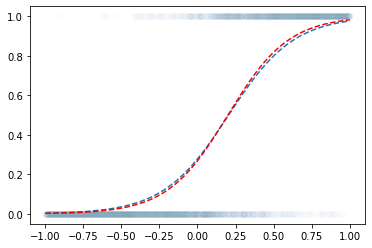

In [34]:
plt.scatter(X,y,alpha=0.01) 
plt.plot(X,net(X).data,'--') 
plt.plot(X,v,'--r')

대회에 한번 나가봐요!! 

**교수님** OK

2010년: 1등 오류율 28% 

2011년: 1등 오류율 26% 

--- 

*CPU의 학습속도가 너무 느림* 
- 알렉스: GPU를 이용하여 학습을 해보자. 

*오버피팅 문제발생*
- 대학원생: 드랍아웃 


*GPU를 써도 학습속도가 느린단점이 있었음* 
- 알렉스: 벤지오연구실의 RuLU함수를 써보자. 

2012년 우승: 알렉스넷 오류율 16% 